In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [2]:
#count no of images
number_of_images = {}
number_of_images['no'] = len(os.listdir('no'))
number_of_images['yes'] = len(os.listdir('yes'))

In [3]:
print(number_of_images)

{'no': 17, 'yes': 17}


# splitting the data
->70% for Training
->15% for validation
->15% for testing

In [4]:
def datafolder(p, split):
    if not os.path.exists("./" + p):
        os.mkdir("./" + p)

        for dir in os.listdir("./"):
            if dir in ['yes', 'no']:
                os.makedirs("./" + p + "/" + dir)

                for img in np.random.choice(a=os.listdir(os.path.join("./", dir)),
                                            size=math.floor((split * number_of_images[dir]) - 5),
                                            replace=False):
                    o = os.path.join("./", dir, img)
                    d = os.path.join("./" + p, dir)
                    shutil.copy(o, d)
                    os.remove(o)
    else:
        print(f"{p} folder exists")

In [5]:
datafolder("train",0.7)
datafolder("val",.15)
datafolder("test",0.15)

train folder exists
val folder exists
test folder exists


# Model building

In [6]:
Model = Sequential()
Model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
Model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
Model.add(MaxPool2D(pool_size=(2, 2)))
Model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
Model.add(MaxPool2D(pool_size=(2, 2)))
Model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
Model.add(MaxPool2D(pool_size=(2, 2)))
Model.add(Dropout(rate=0.25))
Model.add(Flatten())
Model.add(Dense(units=64, activation='relu'))
Model.add(Dropout(rate=0.25))
Model.add(Dense(units=1, activation='sigmoid'))
Model.summary()
Model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)      

# Data Generator

In [7]:
def preprocessing_images(path, image_data_generator):
    image = image_data_generator.flow_from_directory(
        directory=path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )
    return image
    
train_data_gen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rescale=1/255,
    horizontal_flip=True
)

In [8]:
train_data = preprocessing_images("./train", train_data_gen)

Found 166 images belonging to 2 classes.


In [9]:
test_data_gen = ImageDataGenerator(rescale=1/255)
test_data = preprocessing_images("./test", test_data_gen)

Found 27 images belonging to 2 classes.


In [10]:
val_data_gen = ImageDataGenerator(rescale=1/255)
val_data = preprocessing_images("./val", val_data_gen)

Found 27 images belonging to 2 classes.


In [11]:
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath="./bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode='auto')
cd = [es, mc]

# model Training

In [12]:
hs = Model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=cd
)

Epoch 1/30


6/6 [==============================] - ETA: 0s - loss: 0.6989 - accuracy: 0.5964
Epoch 1: val_accuracy improved from -inf to 0.81481, saving model to .\bestmodel.h5


C:\Users\yoges\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 10s 1s/step - loss: 0.6989 - accuracy: 0.5964 - val_loss: 0.6063 - val_accuracy: 0.8148
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.6386
Epoch 2: val_accuracy did not improve from 0.81481
6/6 [==============================] - 6s 861ms/step - loss: 0.6641 - accuracy: 0.6386 - val_loss: 0.5030 - val_accuracy: 0.7407
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.5809 - accuracy: 0.7169
Epoch 3: val_accuracy did not improve from 0.81481
6/6 [==============================] - 6s 884ms/step - loss: 0.5809 - accuracy: 0.7169 - val_loss: 0.5625 - val_accuracy: 0.7407
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.5806 - accuracy: 0.7530
Epoch 4: val_accuracy improved from 0.81481 to 0.85185, saving model to .\bestmodel.h5
6/6 [==============================] - 6s 1s/step - loss: 0.5806 - accuracy: 0.7530 - val_loss: 0.4258 - val_accuracy: 0.8519
Epoch 5/30
6/6 [========

# Model Graphical Interpretation

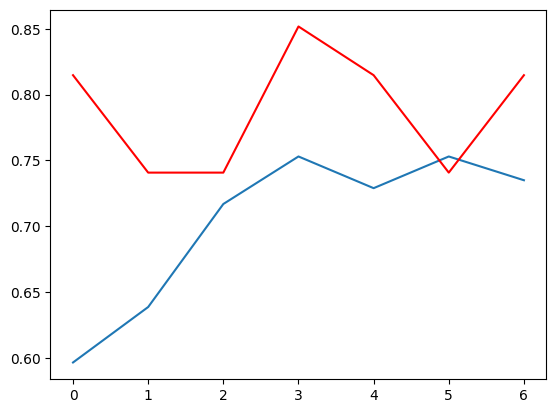

In [13]:
h = hs.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.show()

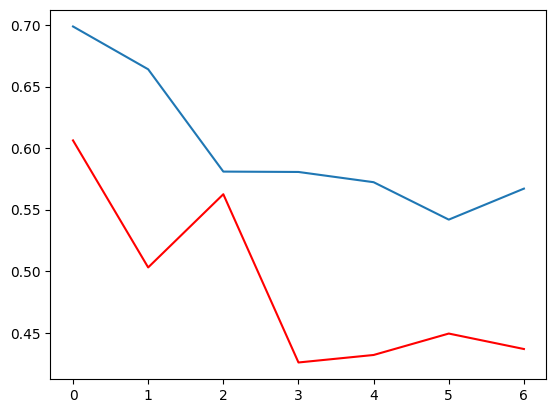

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.show()

In [15]:
Model=load_model("bestmodel.h5")
acc = Model.evaluate(test_data)[1]
print(f"The accuracy of the model on the test set is: {acc*100}")

1/1 [==============================] - 0s 319ms/step - loss: 0.5821 - accuracy: 0.8148
The accuracy of the model on the test set is: 81.4814805984497
